In [ ]:
#to install the drive
from google.colab import drive
drive.mount('/content/drive')

# 1 import libraries

In [34]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


# 2 load dataset AND PREPROCESSING

In [35]:
# Load ckextended CSV file
df = pd.read_csv("/content/drive/MyDrive/TAI_Project/Gattu/ckextended.csv")


In [ ]:
# Display basic information about the dataset
df.info()

In [ ]:
print(df['emotion'].value_counts())

In [38]:
# Convert pixel strings to numpy arrays
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))




In [39]:
# Resize images to a standard size (e.g., 48x48)
img_size = (48, 48)
df['pixels'] = df['pixels'].apply(lambda x: cv2.resize(x.reshape(48, 48), img_size).flatten())



In [40]:
# Normalize pixel values to [0, 1]
df['pixels'] = df['pixels'] / 255.0



In [41]:
# Determine the number of classes dynamically
num_classes = len(df['emotion'].unique())

# Split dataset into features and labels
X = np.vstack(df['pixels']).reshape(-1, 48, 48, 1)
y = to_categorical(df['emotion'], num_classes=num_classes)


# 3 Data Augmentation

In [42]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# 4 Define the CNN architecture

In [43]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


Train the model

In [44]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


COMPILE AND TRAIN

In [45]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [46]:
# Train the model with data augmentation
history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,
    epochs=15,
    validation_data=(X_test, y_test)
)

Epoch 1/15


<ipython-input-46-744d35c3384d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


23/23 [==============================] - 5s 159ms/step - loss: 1.3814 - accuracy: 0.6454 - val_loss: 1.3356 - val_accuracy: 0.6413
Epoch 2/15
23/23 [==============================] - 3s 119ms/step - loss: 1.3290 - accuracy: 0.6454 - val_loss: 1.3425 - val_accuracy: 0.6413
Epoch 3/15
23/23 [==============================] - 5s 197ms/step - loss: 1.3224 - accuracy: 0.6454 - val_loss: 1.3364 - val_accuracy: 0.6413
Epoch 4/15
23/23 [==============================] - 3s 145ms/step - loss: 1.3034 - accuracy: 0.6454 - val_loss: 1.3062 - val_accuracy: 0.6413
Epoch 5/15
23/23 [==============================] - 2s 106ms/step - loss: 1.3065 - accuracy: 0.6454 - val_loss: 1.3082 - val_accuracy: 0.6413
Epoch 6/15
23/23 [==============================] - 3s 108ms/step - loss: 1.3645 - accuracy: 0.6454 - val_loss: 1.3088 - val_accuracy: 0.6413
Epoch 7/15
23/23 [==============================] - 3s 107ms/step - loss: 1.3197 - accuracy: 0.6454 - val_loss: 1.3104 - val_accuracy: 0.6413
Epoch 8/15
23/23 

# 5 Evaluate the model

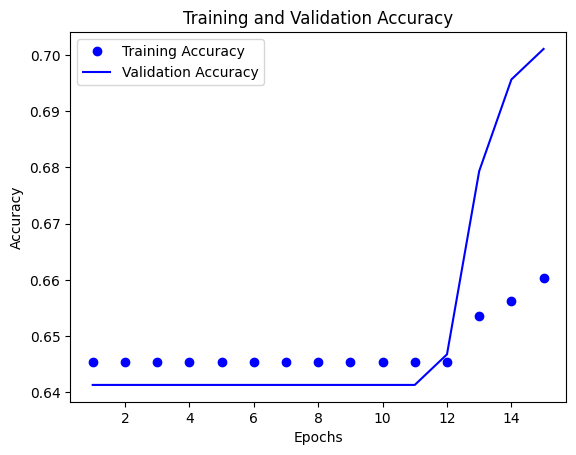

In [47]:
import matplotlib.pyplot as plt

# Access the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [48]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


6/6 [==============================] - 0s 26ms/step - loss: 1.0988 - accuracy: 0.7011
Test Accuracy: 0.7010869383811951


# 6 Fine-tuning

In [53]:
# Example: Adjust learning rate
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
# Train the model with data augmentation
history1 = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20


<ipython-input-54-390072abd41a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(


23/23 [==============================] - 4s 118ms/step - loss: 1.1944 - accuracy: 0.6603 - val_loss: 1.0755 - val_accuracy: 0.7011
Epoch 2/20
23/23 [==============================] - 4s 163ms/step - loss: 1.1721 - accuracy: 0.6590 - val_loss: 1.0752 - val_accuracy: 0.7065
Epoch 3/20
23/23 [==============================] - 3s 146ms/step - loss: 1.1602 - accuracy: 0.6739 - val_loss: 1.0699 - val_accuracy: 0.7065
Epoch 4/20
23/23 [==============================] - 3s 118ms/step - loss: 1.1746 - accuracy: 0.6549 - val_loss: 1.0663 - val_accuracy: 0.7065
Epoch 5/20
23/23 [==============================] - 3s 112ms/step - loss: 1.1566 - accuracy: 0.6739 - val_loss: 1.0587 - val_accuracy: 0.7065
Epoch 6/20
23/23 [==============================] - 3s 136ms/step - loss: 1.1574 - accuracy: 0.6698 - val_loss: 1.0567 - val_accuracy: 0.7065
Epoch 7/20
23/23 [==============================] - 4s 152ms/step - loss: 1.1480 - accuracy: 0.6630 - val_loss: 1.0540 - val_accuracy: 0.7065
Epoch 8/20
23/23 

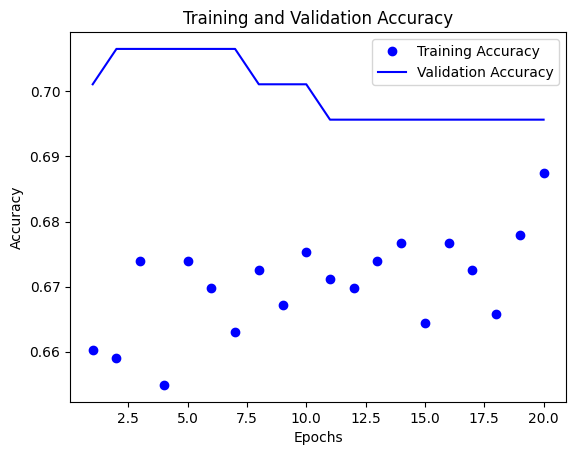

In [57]:
import matplotlib.pyplot as plt

# Access the training history
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
